In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
''' reading dataset '''
df1 = pd.read_csv('dataset.csv')
df2 = pd.read_csv('Symptom-severity.csv')
df3 = pd.read_csv('symptom_Description.csv')
df4 = pd.read_csv('symptom_precaution.csv')

In [10]:
''' shape of data '''
print("df1 shape: ", df1.shape)
print("df2 shape: ", df2.shape)
print("df3 shape: ", df3.shape)
print("df4 shape: ", df4.shape)

df1 shape:  (4920, 18)
df2 shape:  (133, 2)
df3 shape:  (41, 2)
df4 shape:  (41, 5)


In [11]:
for df in [df1, df2, df3, df4]:
    if df.isna().sum().any():
        print("has null values")
    else:
        print("has not any null values")

has null values
has not any null values
has not any null values
has null values


In [12]:
''' unique diseases in df1 '''
df1.Disease.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [13]:
''' reshaping '''
columns = [i for i in df1.iloc[:,1:].columns]
columns

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [14]:
''' Turns all columns in 'cols' to variable column. '''
temp = pd.melt(df1.reset_index() ,id_vars = ['index'], value_vars = columns )
temp['add1'] = 1
temp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [15]:
''' pivot table '''
all_diseases = pd.pivot_table(temp, values='add1', index='index', columns='value')

'''Add labels column'''
all_diseases.insert(0,'label',df1['Disease'])

In [16]:
''' filling null values with 0 '''
all_diseases = all_diseases.fillna(0)
all_diseases.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
''' shape of all_diseases '''
all_diseases.shape

(4920, 132)

In [18]:
# Assuming the data preprocessing steps have been completed and you have 'all_diseases' DataFrame ready
# Encoding the 'label' column to have numeric values
label_encoder = LabelEncoder()
all_diseases['label'] = label_encoder.fit_transform(all_diseases['label'])

# Splitting the data into features and labels
X = all_diseases.drop('label', axis=1)
y = to_categorical(all_diseases['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

C:\Users\harit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4701 - loss: 3.0735
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.2378
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0252
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0111
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0062
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 12/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [20]:
# Predictions
pred_probs = model.predict(X_test)
preds = np.argmax(pred_probs, axis=1)

# Convert one-hot encoded test labels back to their original form for evaluation
y_test_labels = np.argmax(y_test, axis=1)

# Evaluation
print(classification_report(y_test_labels, preds))
cm=confusion_matrix(y_test_labels, preds)
print("Confusion Matrix:\n", confusion_matrix(y_test_labels, preds))
print("Accuracy score:", accuracy_score(y_test_labels, preds))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        45
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.0

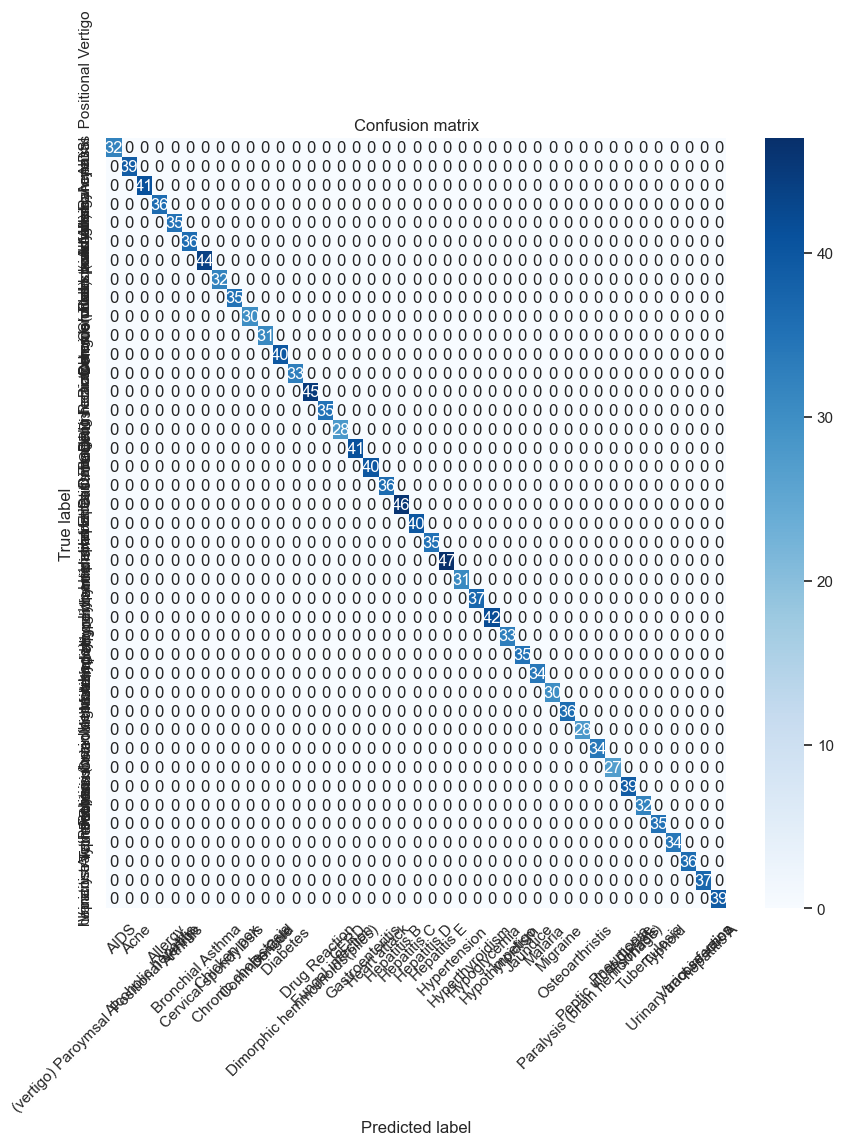

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()

# Assuming you have already computed the confusion matrix 'cm' and have 'classes'
plot_confusion_matrix(cm, classes=label_encoder.classes_)


In [22]:
def predict_disease(symptom_names):
    symptoms_input = [0] * len(X.columns)  # Initialize an input vector with all symptoms set to 0
    for symptom in symptom_names:
        if symptom in X.columns:
            symptoms_input[X.columns.get_loc(symptom)] = 1
        else:
            print(f"Symptom '{symptom}' not recognized.")
    
    symptoms_array = np.array([symptoms_input])
    predicted_disease_prob = model.predict(symptoms_array)
    predicted_disease_index = np.argmax(predicted_disease_prob)
    predicted_disease = label_encoder.inverse_transform([predicted_disease_index])
    
    return predicted_disease[0]

In [23]:
predict_disease([" fatigue"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


'Hepatitis C'